In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = 'shopping_behavior_updated.csv'
data = pd.read_csv(file_path)
data.head()
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
# Data Preprocessing
data.drop('Customer ID', axis=1, inplace=True)

# There is no missing data

# Label Encoding for binary columns
le = LabelEncoder()
binary_columns = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in binary_columns:
    data[col] = le.fit_transform(data[col])

numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_columns = ['Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 
                       'Shipping Type', 'Payment Method', 'Frequency of Purchases']

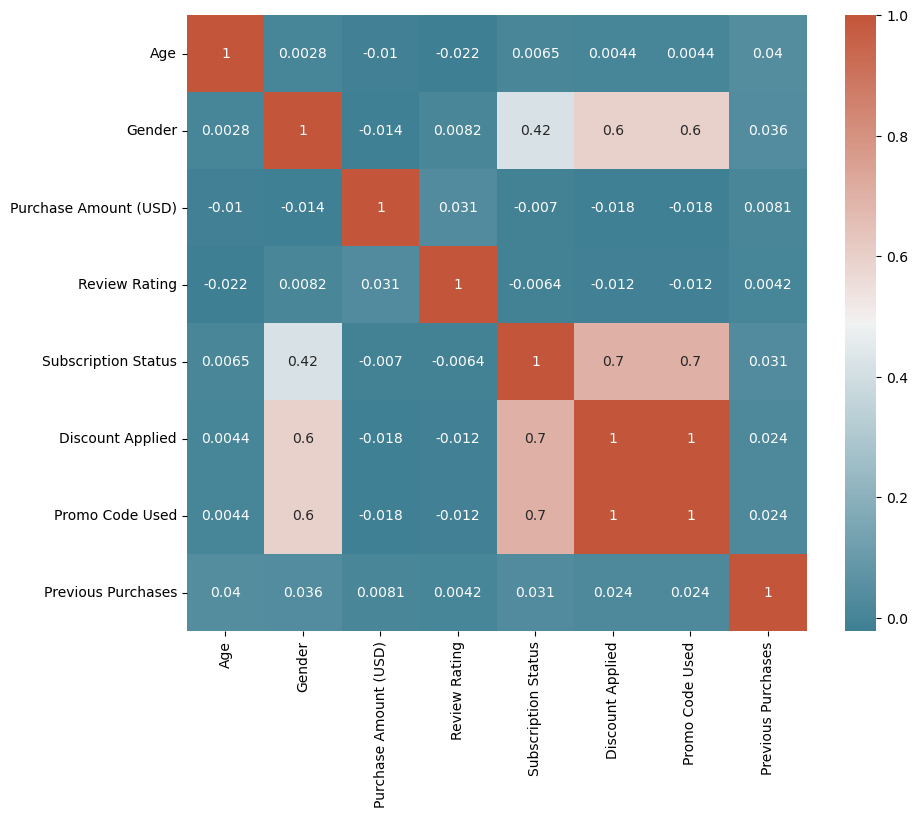

In [4]:
corr = data.loc[:, ~data.columns.isin(categorical_columns)].corr() #exclude categorical_columns

plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

In [5]:
# One-Hot Encoding for non-binary categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

In [6]:
# Standard Scaler for numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [7]:
# Display the first few rows of the preprocessed dataset
data

,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Item Purchased_Backpack,Item Purchased_Belt,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,1,-0.285629,-0.907584,1,1,1,-0.785831,0,0,...,0,0,1,0,0,0,1,0,0,0
1,-1.648629,1,0.178852,-0.907584,1,1,1,-1.616552,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.390088,1,0.558882,-0.907584,1,1,1,-0.162789,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.517099,1,1.276716,-0.349027,1,1,1,1.637107,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.061263,1,-0.454531,-1.466141,1,1,1,0.391025,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,0,-1.341267,0.628448,0,0,0,0.460252,0,0,...,0,0,1,0,0,0,0,0,0,1
3896,0.521618,0,-0.454531,1.047366,0,0,0,1.083293,1,0,...,0,0,0,0,1,0,0,0,0,0
3897,0.127028,0,-1.130139,-1.186862,0,0,0,-0.093563,0,1,...,0,0,1,0,0,0,0,0,1,0
3898,-0.004502,0,0.727784,0.069891,0,0,0,-0.093563,0,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
# Export the DataFrame to a CSV file
data.to_csv("shopping_behavior_updated1.csv", index=False)

In [9]:
# Load the dataset
file_path = 'shopping_behavior_updated1.csv'
data = pd.read_csv(file_path)

## EDA

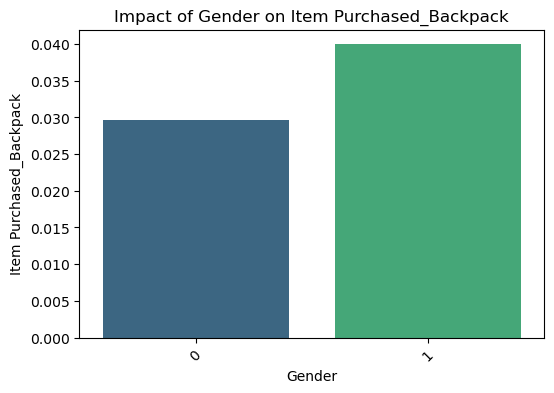

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Item Purchased_Backpack', data=data, ci=None, palette='viridis')
plt.title("Impact of Gender on Item Purchased_Backpack")
plt.xticks(rotation=45)
plt.show()

## Using the silhoutte score to find the optimal number of clusters

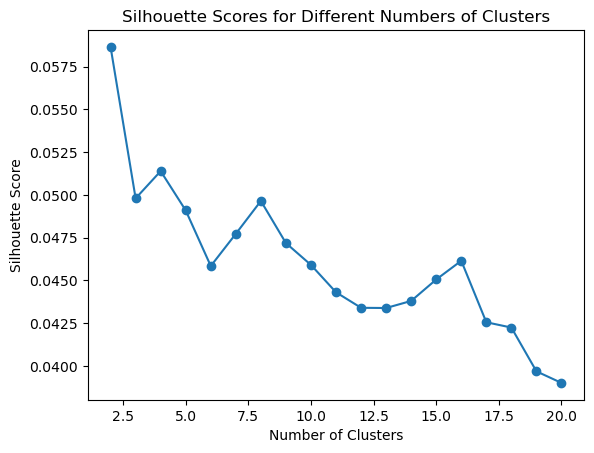

In [12]:
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(data, range_clusters):
    silhouette_scores = [] # List to store silhouette scores for different cluster numbers
    for cluster in range_clusters:
        kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

range_clusters = range(2, 21) # Silhouette score requires at least 2 clusters
silhouette_scores = calculate_silhouette_scores(data, range_clusters)

# Plotting the silhouette scores
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Optimal Number of Clusters: 2


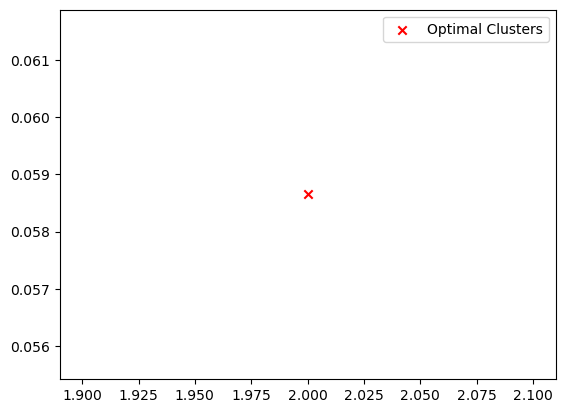

In [13]:
# Find the optimal number of clusters
optimal_clusters = range_clusters[np.argmax(silhouette_scores)]
print("Optimal Number of Clusters:", optimal_clusters)

# Highlight the optimal point on the plot
plt.scatter(optimal_clusters, max(silhouette_scores), color='red', marker='x', label='Optimal Clusters')
plt.legend()
plt.show()

# K-Means

In [14]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Train K-Means on the PCA-transformed data
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data_pca)
kmeans

KMeans(n_clusters=2, n_init=10, random_state=42)

In [15]:
kmeans.inertia_

5364.717543154066

In [16]:
kmeans.cluster_centers_

array([[ 0.63994894, -0.54309786],
       [-0.64456   ,  0.54701107]])

In [17]:
kmeans.n_iter_

8

In [18]:
kmeans_silhouette = silhouette_score(data, kmeans.labels_).round(2)
print(f"Silhouette Score: {kmeans_silhouette}")

Silhouette Score: 0.05


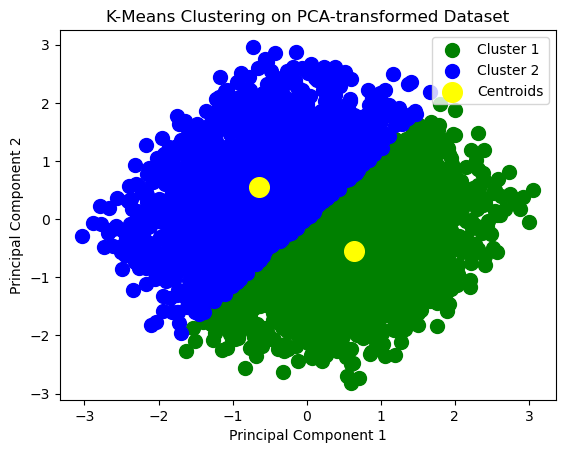

In [19]:
# Visualize the clusters
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')

# Plot the centroids in the PCA space
centers_pca = kmeans.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='yellow', label='Centroids')

# Finalize the plot
plt.title('K-Means Clustering on PCA-transformed Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Hierarchical clustering

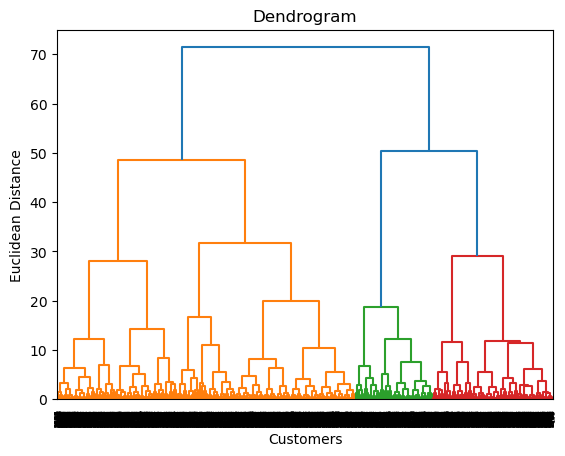

In [20]:
import scipy.cluster.hierarchy as sch
# Create the dendrogram using the Ward's method on the PCA-transformed data
dendrogram = sch.dendrogram(sch.linkage(data_pca, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

To determine the number of clusters from a dendrogram, we would typically look for the longest vertical lines that are not crossed by any horizontal line (extended across the entire width of the plot).

There are 2 very prominent gaps:

- The topmost blue line suggests the data could be split into 2 clusters.
- Another significant gap can be seen a bit lower, where the dendrogram branches into three main arms.
  
Based on these observations, it appears there could be 2 or 3 clusters, depending on where we choose to "cut" the dendrogram based on the specific context and domain knowledge.

### For the sake of simplicity we assume there are 2 clusters. Now, let's plot the Agglomerative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")

In [22]:
y_hc = cluster.fit_predict(data_pca)

In [23]:
silhouette_avg = silhouette_score(data_pca, y_hc)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30703099172530274


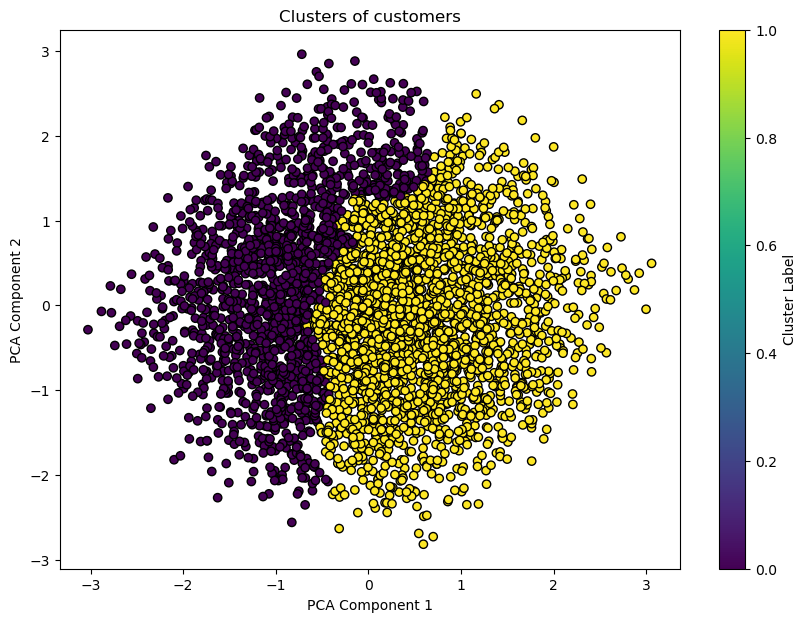

In [24]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_hc, cmap='viridis', edgecolors='k')
plt.title('Clusters of customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Comparing the clutering algorithms

In this comparative study of clustering algorithms applied to a dataset on shopping habits, the distinct characteristics of each method yielded varied insights. The KMeans algorithm, which is optimal for spherical cluster shapes and when the cluster count is pre-set, produced a silhouette score of 0.05. This score, on the lower end, suggests a lack of well-defined, spherical clusters in the dataset. Furthermore, Agglomerative Clustering, offering a hierarchical perspective of data clustering and excelling in situations where inter-data point relationships are pivotal, demonstrated a markedly better silhouette score of 0.3. This score suggests a much clearer and meaningful clustering structure, pointing to the potential significance of hierarchical relationships in the dataset.

The insights derived from these clustering methods regarding the dataset highlight different dimensions of customer segmentation and purchasing patterns. KMeans likely pinpointed broad customer groups, albeit with limited clarity. In contrast, Agglomerative Clustering, with its emphasis on layered relationships, likely unveiled more intricate patterns in consumer preferences and behaviors. Therefore, these methods offer a holistic view of the patterns in the shopping behavior data, each contributing distinct perspectives that, collectively, facilitate a better comprehension of customer segmentation strategies.

For simplicity and easier interpretation for non-technical employees (i.e. Marketing, Sales, Business Development, etc) we choose the KMeans clustering algorithm for the ecommerce platform customer segmentation.

# Interpretation of Cluster 0 and Cluster 1 for KMeans

In [25]:
# Undo Standard Scaling for numerical columns
data_undo = data.copy()
data_undo[numerical_columns] = scaler.inverse_transform(data_undo[numerical_columns])

# 1. Add cluster labels to the original data_undo
data_undo['Cluster'] = y_kmeans

In [26]:
# 2. Explore cluster statistics
cluster_statistics = data_undo.groupby('Cluster').mean()
print("Cluster Statistics:")
for i in cluster_statistics.columns:
    print(cluster_statistics[i])

Cluster Statistics:
Cluster
0    35.939580
1    52.222393
Name: Age, dtype: float64
Cluster
0    0.656938
1    0.703133
Name: Gender, dtype: float64
Cluster
0    58.411162
1    61.121726
Name: Purchase Amount (USD), dtype: float64
Cluster
0    3.774603
1    3.725218
Name: Review Rating, dtype: float64
Cluster
0    0.246288
1    0.293785
Name: Subscription Status, dtype: float64
Cluster
0    0.407066
1    0.453005
Name: Discount Applied, dtype: float64
Cluster
0    0.407066
1    0.453005
Name: Promo Code Used, dtype: float64
Cluster
0    16.049155
1    34.682589
Name: Previous Purchases, dtype: float64
Cluster
0    0.039427
1    0.033898
Name: Item Purchased_Backpack, dtype: float64
Cluster
0    0.044547
1    0.038007
Name: Item Purchased_Belt, dtype: float64
Cluster
0    0.040451
1    0.047252
Name: Item Purchased_Blouse, dtype: float64
Cluster
0    0.033794
1    0.040062
Name: Item Purchased_Boots, dtype: float64
Cluster
0    0.040451
1    0.042116
Name: Item Purchased_Coat, dtype: fl

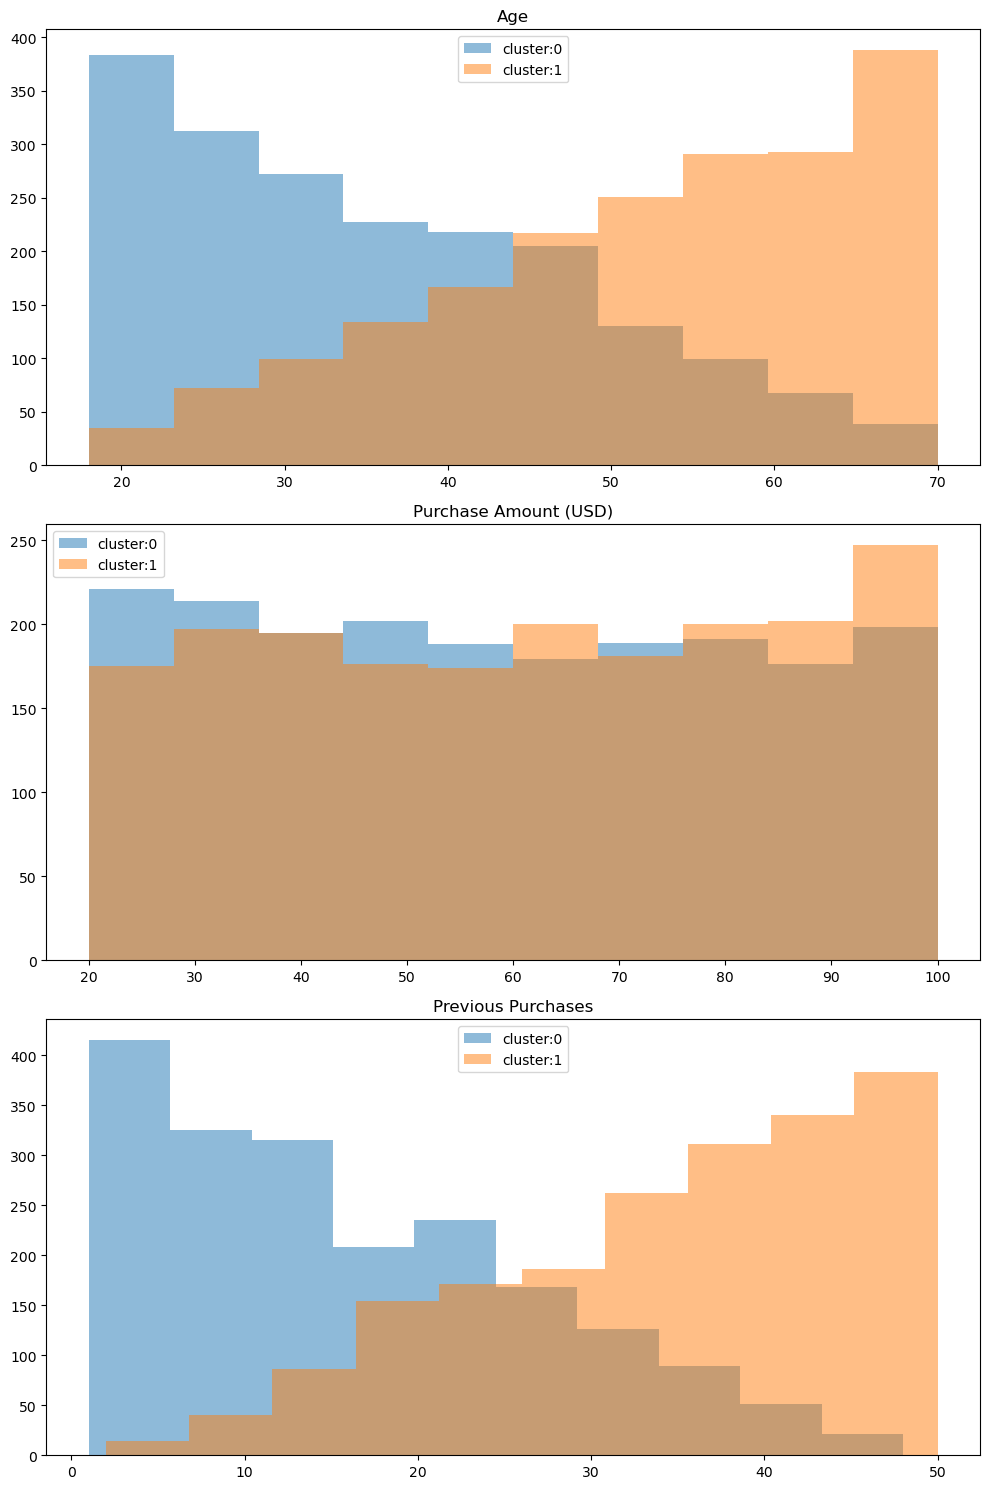

In [27]:
# 3. Visualize original features by cluster
plt.figure(figsize=(10, 15))

columns_to_visualize = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']

for i, col_name in enumerate(columns_to_visualize):
    plt.subplot(len(columns_to_visualize), 1, i+1)
    for cluster in range(2):
        feature_data = data_undo.loc[data_undo['Cluster'] == cluster, col_name]
        plt.hist(feature_data, alpha=0.5, label=f'cluster:{cluster}')
    plt.title(col_name, fontsize=12)
    plt.legend()

plt.tight_layout()
plt.show()

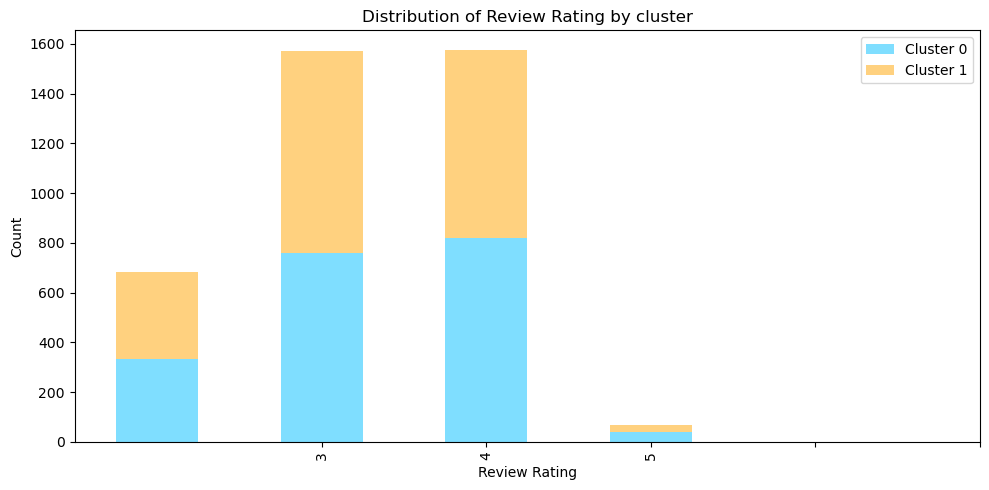

In [28]:
data_undo['Review Rating'] = data_undo['Review Rating'].astype(int)  # Ensure that the ratings column is of integer type

# Create a pivot table to count the number of occurrences of each rating value in each cluster
pivot_table = pd.crosstab(data_undo['Cluster'], data_undo['Review Rating'], margins=False)

# Create a stacked bar chart
plt.figure(figsize=(10, 5))
cluster_0 = pivot_table.iloc[0]
cluster_1 = pivot_table.iloc[1]
cluster_0.plot(kind='bar', alpha=0.5, color='deepskyblue', label='Cluster 0')
cluster_1.plot(kind='bar', alpha=0.5, color='orange', label='Cluster 1', bottom=cluster_0)

# Add a legend and a title
plt.legend()
plt.title('Distribution of Review Rating by cluster')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.xticks(np.arange(1, 6))

plt.tight_layout()
plt.show()

In [29]:
# Get a list of binary columns (except column 'Cluster')
binary_cols = [col for col in data_undo.columns if data_undo[col].nunique() == 2 and col != 'Cluster']

# Calculate statistics for each binary column for cluster 0 and cluster 1
for col in binary_cols:
    clust0 = data_undo.loc[data_undo['Cluster'] == 0, col]
    clust1 = data_undo.loc[data_undo['Cluster'] == 1, col]
    print()
    print(f"# '{col}' Statistics:")
    print(f"Cluster 0:")
    print(f"  Mean: {clust0.mean():.4f}")
    print(f"  Median: {clust0.median():.4f}")
    print(f"  Standard Deviation: {clust0.std():.4f}")
    print(f"  Percentage of True values: {clust0.mean()*100:.1f}%")
    print(f"Cluster 1:")
    print(f"  Mean: {clust1.mean():.4f}")
    print(f"  Median: {clust1.median():.4f}")
    print(f"  Standard Deviation: {clust1.std():.4f}")
    print(f"  Percentage of True values: {clust1.mean()*100:.1f}%")


# 'Gender' Statistics:
Cluster 0:
  Mean: 0.6569
  Median: 1.0000
  Standard Deviation: 0.4749
  Percentage of True values: 65.7%
Cluster 1:
  Mean: 0.7031
  Median: 1.0000
  Standard Deviation: 0.4570
  Percentage of True values: 70.3%

# 'Subscription Status' Statistics:
Cluster 0:
  Mean: 0.2463
  Median: 0.0000
  Standard Deviation: 0.4310
  Percentage of True values: 24.6%
Cluster 1:
  Mean: 0.2938
  Median: 0.0000
  Standard Deviation: 0.4556
  Percentage of True values: 29.4%

# 'Discount Applied' Statistics:
Cluster 0:
  Mean: 0.4071
  Median: 0.0000
  Standard Deviation: 0.4914
  Percentage of True values: 40.7%
Cluster 1:
  Mean: 0.4530
  Median: 0.0000
  Standard Deviation: 0.4979
  Percentage of True values: 45.3%

# 'Promo Code Used' Statistics:
Cluster 0:
  Mean: 0.4071
  Median: 0.0000
  Standard Deviation: 0.4914
  Percentage of True values: 40.7%
Cluster 1:
  Mean: 0.4530
  Median: 0.0000
  Standard Deviation: 0.4979
  Percentage of True values: 45.3%

# 'Item Purchas

## Based on the comprehensive statistical analysis, we draw the following key insights:

- **Age:** Cluster 0 exhibits an inclination towards an older demographic, while Cluster 1 tends to be younger.

- **Purchase Amount (USD):** Notably, Cluster 0 showcases a tendency for larger purchase amounts compared to Cluster 1. This aligns logically with the observation that Cluster 0 comprises an older population, often characterized by stable careers and higher income.

- **Past Purchases:** Cluster 0 demonstrates a higher frequency of past purchases in contrast to Cluster 1. This observation is consistent with the notion that the older demographic in Cluster 0 has a broader range of needs, including items for their children (toys, stationary, clothes, foods, etc.) and household essentials for the family.

- **Review Rating:** Interestingly, no significant distinctions emerge between Cluster 0 and Cluster 1 concerning the Review Rating column. Both clusters tend to assign similar star ratings, indicating that age may not correlate with increased critical evaluation or heightened expectations regarding the purchased products.

- **Binary Columns:** Analysis of binary columns reveals no substantial variations between Cluster 0 and Cluster 1.

In summary, the two identified customer segments are as follows: 
1. **Cluster 0:** Comprising older, wealthier customers with a higher frequency of past purchases.
2. **Cluster 1:** Encompassing younger, more budget-conscious customers with fewer past purchases.

It's essential to note that while the Review Rating column and binary columns may not exhibit significant differences between clusters based on basic statistical measures, further investigation may be warranted. Additional analyses, such as advanced statistical modeling or detailed data visualization, could uncover more nuanced patterns or interactions that contribute to a deeper understanding of customer behavior and preferences.

### These insights can provide valuable guidance for businesses to tailor their marketing strategies and product offerings to better meet the distinct needs and preferences of each customer segment.

1. **Cluster 0: Older, Affluent Customers with Diverse Needs:**
   - **Tailoring Products and Services:**
     - Given the older and likely more financially stable nature of Cluster 0, businesses can develop and highlight premium products or services that align with their affluent status.
     - Consider offering a diverse range of products that cater to the varied needs of this demographic, including family-oriented items, luxury goods, and household essentials.

   - **Targeted Marketing Campaigns:**
     - Craft marketing messages that resonate with the life experiences and values of an older demographic. This may include emphasizing product durability, family values, and the convenience of premium offerings.

   - **Personalized Customer Experience:**
     - Implement personalized marketing strategies, leveraging data on past purchases and preferences to enhance the overall customer experience.
     - Loyalty programs or exclusive offers can be designed to reward the loyalty of this customer segment.

   - **Channel Selection:**
     - Choose advertising and communication channels that are more likely to reach and engage an older audience. This might include traditional media, such as television or print, in addition to digital channels.

2. **Cluster 1: Younger, Budget-Conscious Customers with Potential for Future Growth:**
   - **Affordable Product Lines:**
     - Develop and promote affordable product lines to cater to the budget-conscious nature of Cluster 1. This could involve creating entry-level or basic versions of products to appeal to this segment.

   - **Educational Marketing:**
     - Craft marketing campaigns that highlight the value proposition of products, emphasizing quality, functionality, and cost-effectiveness.
     - Use educational content to inform younger customers about the benefits of products and how they align with their needs.

   - **Digital and Social Media Engagement:**
     - Given the likely tech-savvy nature of younger consumers, focus marketing efforts on digital and social media platforms. Leverage influencers or online communities to amplify brand visibility.

   - **Customer Engagement Strategies:**
     - Implement strategies to foster customer loyalty and long-term relationships. This could involve loyalty programs, interactive social media engagement, and responsive customer support.

   - **Anticipation of Future Needs:**
     - Recognize the potential for future growth within this segment. As younger customers advance in their careers and increase their spending capacity, our ecommerce platform should suggest more relevant products to them to meet their changing needs.

# Classification
### Predict if a customer's purchase will use a promo code
This indicates that the customer is a 'bargain hunter', a person who looks for a place or ecommerce platform to buy something at a price that is cheaper than usual market price. For the ecommerce to entice bargain hunter, they must have pricing and marketing strategies that cater to them. For example, offering first-come-first-serve promo code for certain items at a limited time such as Payday Campaign (the last week of each month).

In [30]:
# Set the x attributes and y attribute 
y = data['Promo Code Used'].values

X = data.drop(["Promo Code Used", 'Discount Applied'], axis=1)

Why 'Dicsount Applied' is dropped from X ?

Data leakage occurs when information from the target variable is inadvertently incorporated into the features during model training. 

In this case, the presence of a perfect correlation coefficient of 1.0 between 'Promo Code Used' and 'Discount Applied' indicates a perfect linear relationship. This implies that if 'Discount Applied' contains information about the use of a promo code, keeping it as a feature in the model would lead to data leakage. Including 'Discount Applied' during training could artificially boost the model's performance, as it may unintentionally learn from the target variable.

To mitigate data leakage, we exclude the 'Discount Applied' column from the features (X). This ensures that the model learns solely from independent features, preventing any influence from information that would not be available during the prediction phase, and promotes a more accurate assessment of the model's generalization to new, unseen data.

In [31]:
class_counts = np.bincount(y)
count_0 = class_counts[0]
count_1 = class_counts[1]

print("Count of 0s:", count_0)
print("Count of 1s:", count_1)

Count of 0s: 2223
Count of 1s: 1677


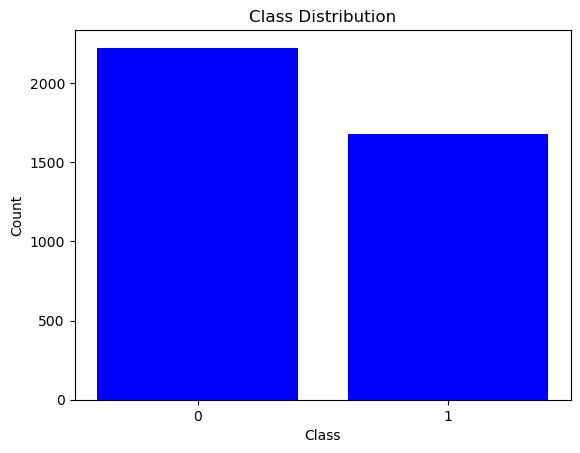

In [32]:
# Plotting the histogram with a single color
plt.bar([0, 1], class_counts, color='blue')  # You can replace 'blue' with your desired color
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1])
plt.show()

In [33]:
import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['Promo Code Used'] == 0]
minority_class = data[data['Promo Code Used'] == 1]

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=count_1, random_state=42)

# Combine the minority class with the downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority_class])

# Update X and y with balanced data
y_balanced = balanced_data['Promo Code Used'].values
X_balanced = balanced_data.drop(["Promo Code Used", 'Discount Applied'], axis=1)

# Display the counts after balancing
class_counts_balanced = np.bincount(y_balanced)
count_0_balanced = class_counts_balanced[0]
count_1_balanced = class_counts_balanced[1]

print("Count of 0s (balanced):", count_0_balanced)
print("Count of 1s (balanced):", count_1_balanced)


Count of 0s (balanced): 1677
Count of 1s (balanced): 1677


In [34]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Set seed for reproducibility
np.random.seed(42)

In [35]:
# feature scaling 

#Standardise feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       527
           1       0.81      0.79      0.80       448

    accuracy                           0.82       975
   macro avg       0.82      0.82      0.82       975
weighted avg       0.82      0.82      0.82       975



### Training the Decision Tree Classification model

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
decision_tree_classifier = DecisionTreeClassifier()

In [38]:
# Scaling

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [39]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
grid_search = GridSearchCV(estimator = decision_tree_classifier, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [41]:
grid_search.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [43]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [44]:
# Evaluate the performance of the best model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [45]:
# Print the results
print("Best Hyperparameters: ", best_params)
print(f"Best Model Accuracy: {accuracy:.2f}")

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Model Accuracy: 0.81


In [46]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1, min_samples_split = 5)

In [47]:
from sklearn.metrics import classification_report
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)
acc_DT = accuracy_score(y_test, DT_pred)
report = classification_report(y_test, DT_pred)

In [48]:
print(f"Best Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Best Model Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       527
           1       0.95      0.66      0.78       448

    accuracy                           0.83       975
   macro avg       0.86      0.81      0.82       975
weighted avg       0.85      0.83      0.82       975



The model is tailored to predict whether customers will use a promo code, with two distinct classes: Class 0 (Do not use promo code) and Class 1 (Use promo code). Key performance metrics reveal an accuracy of 83%, indicating the correct classification of 83% of samples in the test dataset.

- **Class 0 Metrics:**
  - *Precision (Positive Predictive Value):* 77%
    - 77% of predictions for customers who do not use promo codes were accurate.
  - *Recall (Sensitivity or True Positive Rate):* 97%
    - The model correctly identified 97% of customers who do not use promo codes out of all actual cases.
  - *F1-score:* 86%
    - A balanced F1-score of 86% for Class 0.

- **Class 1 Metrics:**
  - *Precision (Positive Predictive Value):* 95%
    - 95% accuracy in predicting customers who use promo codes.
  - *Recall (Sensitivity or True Positive Rate):* 66%
    - The model captured 66% of customers who use promo codes out of all actual cases.
  - *F1-score:* 78%
    - An F1-score of 78% for Class 1.

**Interpretation:**
- For predicting customers who do not use promo codes (Class 0), the model maintains a high level of accuracy and recall, ensuring correct identification of the majority in this category.

- For predicting customers who use promo codes (Class 1), the model emphasizes high precision, aligning with our objective of offering promo codes more generously. This results in a willingness to potentially miss some customers who would use promo codes, as indicated by the lower recall.

**Considerations:**
- Our preference for maximizing the number of customers using promo codes suggests a need to further optimize the model to increase recall for Class 1.

- The willingness to sacrifice precision for higher recall acknowledges the possibility of sending more promotions to customers who may not use them. However, this aligns with the strategy of casting a broader net to capture a larger audience.

- As the ecommerce platform owner, the implementation of a transaction limit for promo code redemption (e.g., first 10,000 transactions) mitigates the impact of potentially increased promotions, ensuring a controlled and manageable distribution and costs. Therefoew, we will not lose too much profits in case too many customers use the promo codes.

**Recommendation:**
- Considering the goal of maximizing promo code usage, further research and model refinement should focus on strategies to increase recall for Class 1. This iterative process should balance the trade-off between precision and recall to align with our objective of extending promo code offers generously.

In conclusion, the model provides a strong foundation for predicting promo code usage, and with a deliberate focus on increasing recall for Class 1, the ecommerce should offer promotion codes more generously while controlling the costs through first-come-first-serve mechanism of limiting the promo code to be used only for the first 10,000 transactions.

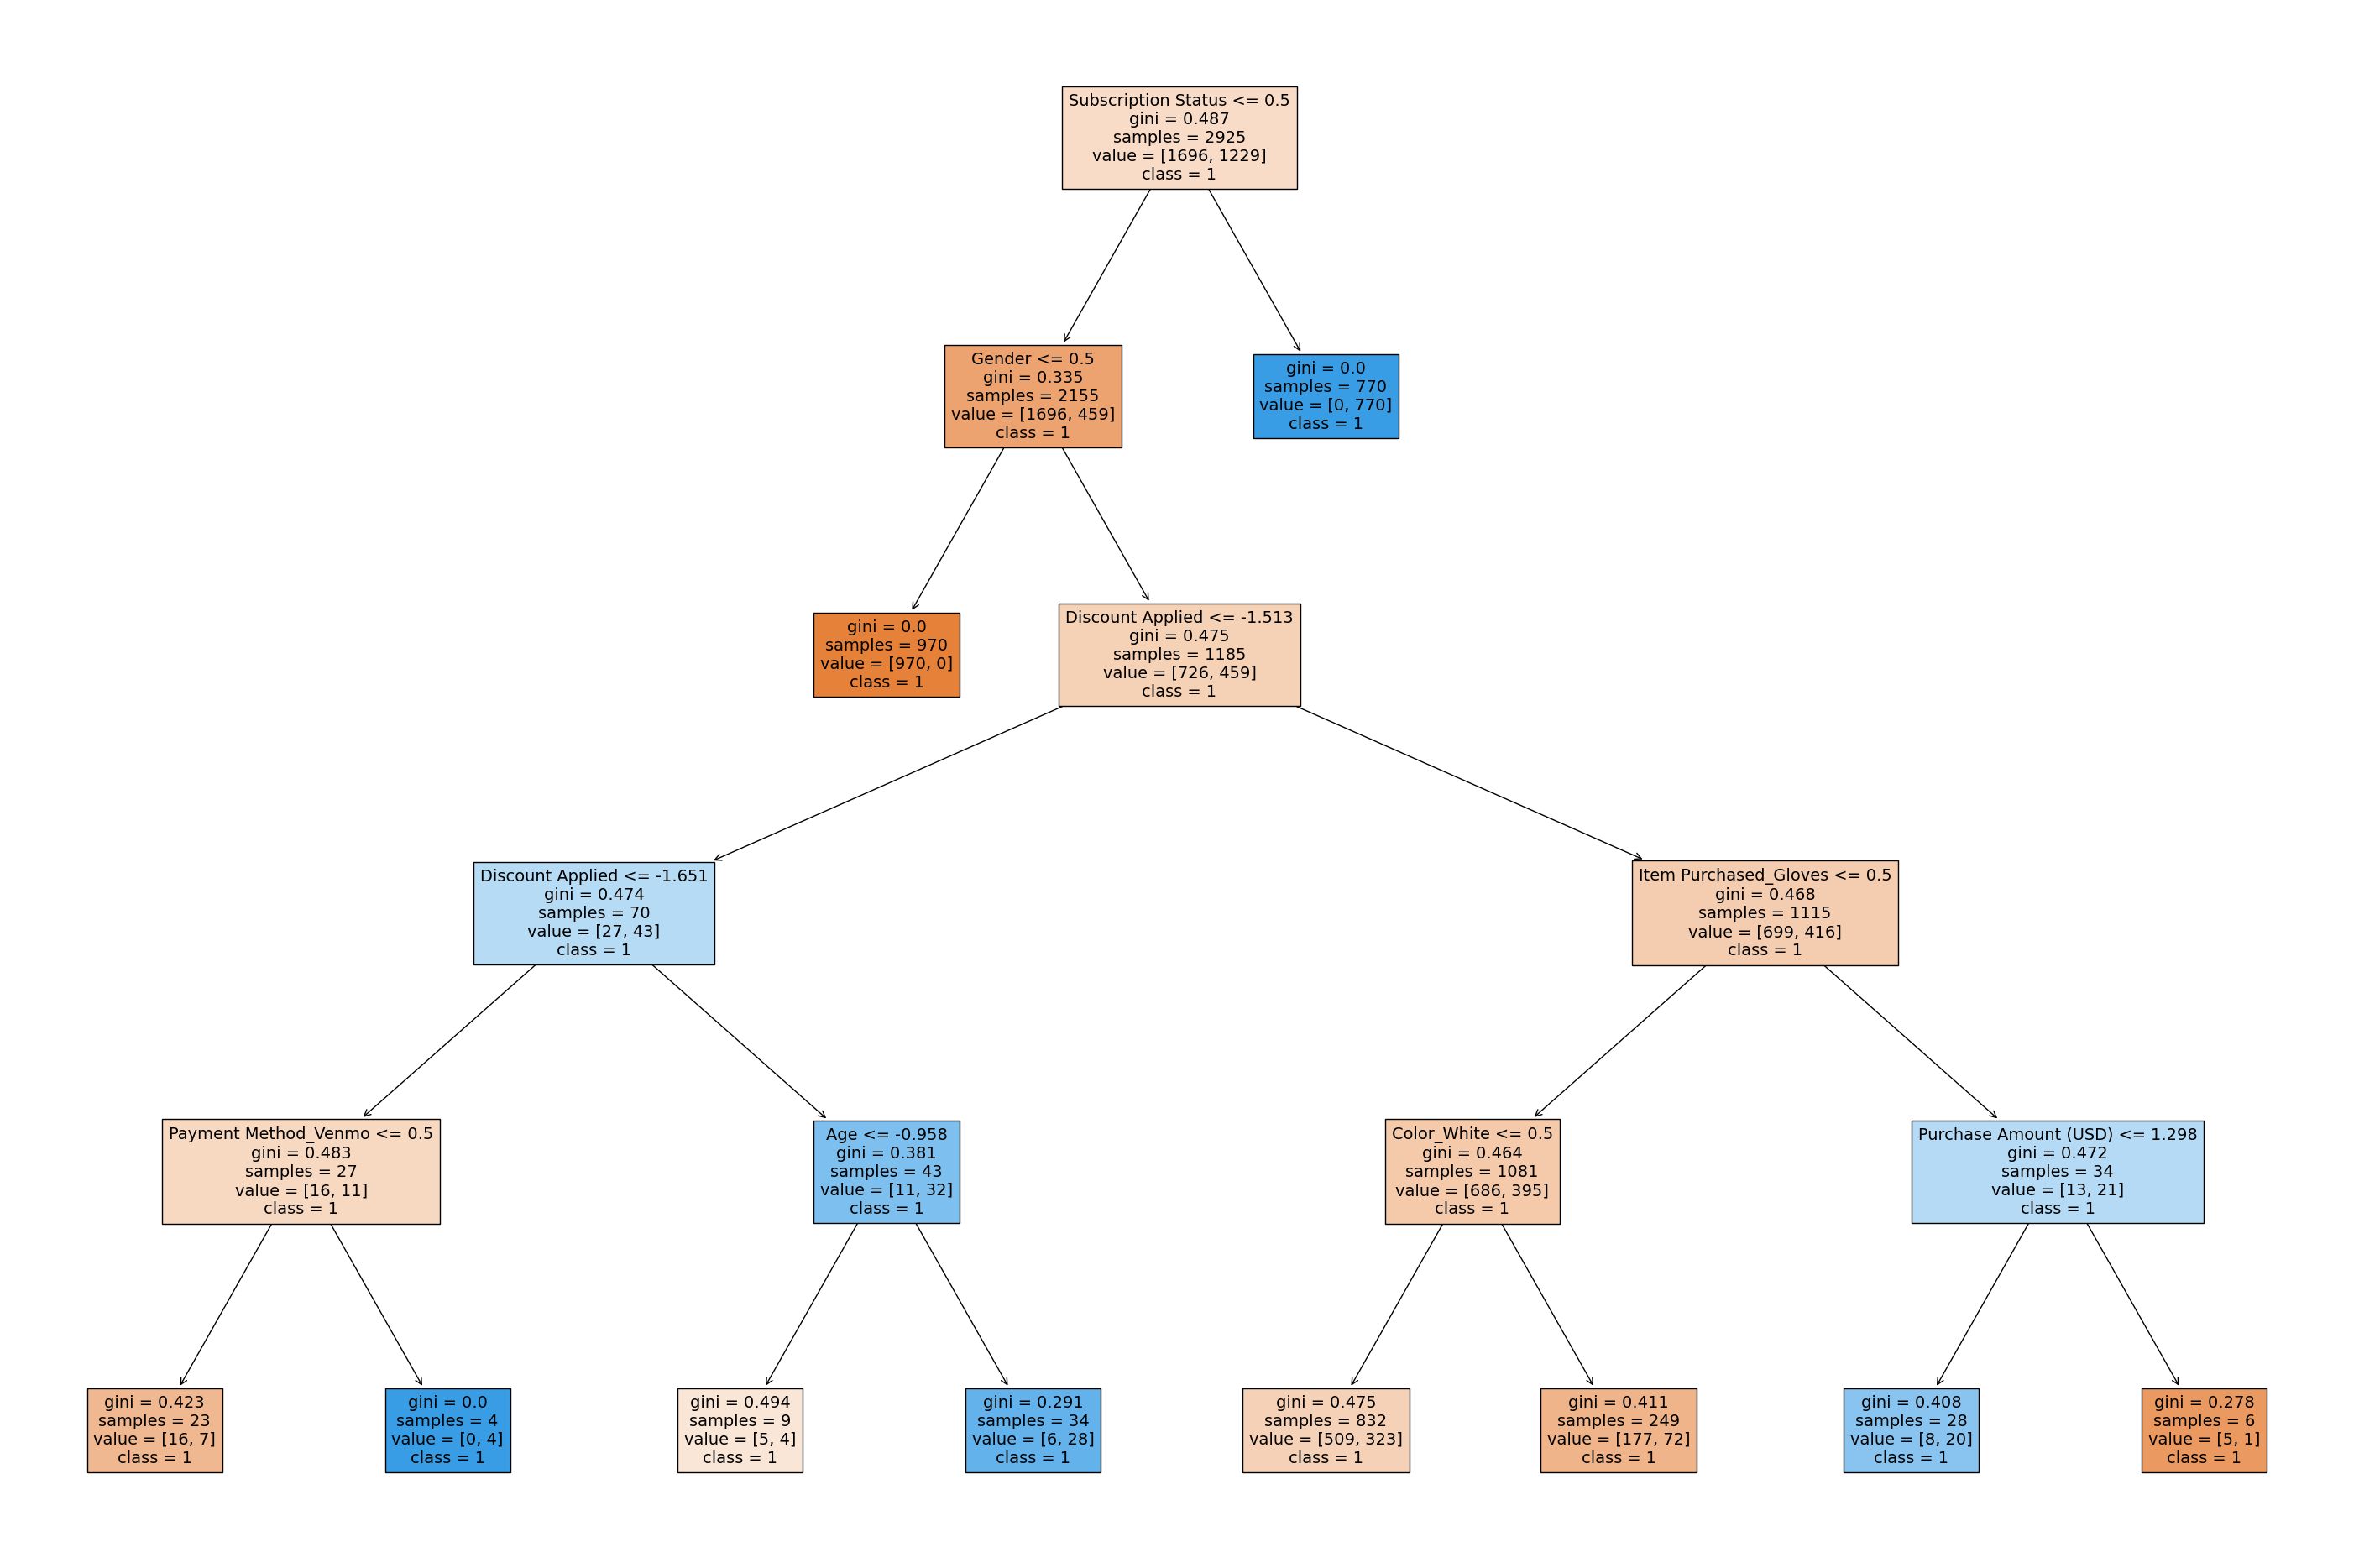

In [49]:
# Plot the Decision Tree
plt.figure(figsize = (36, 24))
plot_tree(DT, filled = True, feature_names = data.columns, class_names = data['Promo Code Used'].astype(str))
plt.show()

# Interpret the Decision Tree

The decision tree model is designed to predict whether customers will use a promo code, with two classes: Class 0 (Do not use promo code) and Class 1 (Use promo code). Below is the detailed structure and interpretation of the decision tree:

- **First, it checks for Subscription Status (Root Node):**
  - *Feature:* Subscription Status
  - *Threshold:* ≤ 0.5
  - *Gini Index:* 0.487
  - *Samples:* 2925
  - *Value:* [1696, 1229]
  - *Class:* 1
  
- **Next, it checks for Gender (First Level, Left Child Node):**
  - *Feature:* Gender
  - *Threshold:* ≤ 0.5
  - *Gini Index:* 0.355
  - *Samples:* 2155
  - *Value:* [1696, 459]
  - *Class:* 1
  
- **Then, it checks for Discount Applied (Second Level, Right Child Node):**
  - *Feature:* Discount Applied
  - *Threshold:* ≤ -1.513
  - *Gini Index:* 0.475
  - *Samples:* 1185
  - *Value:* [726, 459]
  - *Class:* 1
  
- **Further, it checks for Item Purchased_Gloves (Third Level, Right Child Node):**
  - *Feature:* Item Purchased_Gloves
  - *Threshold:* ≤ 0.5
  - *Gini Index:* 0.468
  - *Samples:* 1115
  - *Value:* [699, 416]
  - *Class:* 1
  
**Interpretation:**
- *Feature Importance:*
  - The top-most feature, Subscription Status, is the most critical for classification, followed by Gender, Discount Applied, and Item Purchased_Gloves.
  - These features significantly influence the model’s ability to distinguish between customers who will and will not use a promo code.
- *Threshold Values:*
  - The threshold for Subscription Status (≤ 0.5) splits the customers into two major groups based on their subscription status, highlighting its importance in promo code usage prediction.
  - Further splits for Gender and Discount Applied refine this classification.
- *Gini Index:*
  - The Gini Index values indicate the impurity at each node. Lower Gini values suggest a more distinct separation between the classes at that level.
- *Class Distribution:*
  - The Value at each node provides insight into the class distribution, showing the majority class that the model predicts at that level.

**Consideration:**
- *Feature Selection:*
  - Focus on improving the data quality and feature engineering for Subscription Status, Gender, Discount Applied, and Item Purchased_Gloves to enhance the model's performance.
- *Threshold Optimization:*
  - Analyze and fine-tune the thresholds used in the decision tree to further improve the splits and reduce Gini Index values.
- *Model Evaluation:*
  - Continuously evaluate the model with test data to ensure its performance remains robust. Key metrics like accuracy, precision, recall, and F1-score should be monitored.
- *Data Quality:*
  - Ensure data consistency and completeness, especially for the most important features, to improve the reliability of predictions.

**Recommendation:**
- *Feature Engineering:*
  - Focus on extracting meaningful insights from the most important features, such as creating new variables or refining existing ones.
- *Boosting Recall for Class 1:*
  - Since the goal is to maximize promo code usage, consider strategies to increase recall for Class 1.
- *Controlled Promo Code Distribution:*
  - To mitigate potential losses, implement a first-come-first-serve mechanism limiting promo code redemption to a maximum number of transactions.
- *Iterative Model Refinement:*
  - Continue refining the model based on feedback and evaluation metrics to align its predictions with business objectives.

In conclusion, this decision tree provides actionable insights into customer behavior, forming a solid foundation for predicting promo code usage while offering opportunities for further improvement and optimization.